# Thermodynamic correction factors

The thermodynamic correction factor is an important property when considering diffusion problems. This is an example for the calculation of a thermodynamic correction factor for calculating Stefan-Maxwell diffusion coefficients from Fickian diffusion coefficients. PC-SAFT calculation for the thermodynamic factor of water in a water-indomethacin mixture were performed (see the example in Table 2 from https://doi.org/10.1021/acs.molpharmaceut.1c00984).
Furthermore, this book explains statements which can be made from its values.

In [1]:
import numpy as np
#from numba import config
#config.DISABLE_JIT = True
from diffusionpy import DlnaDlnx,vpure
import matplotlib.pyplot as plt


We define the PC-SAFT parameters and binary interaction parameters.

In [2]:
mi=np.asarray([1.20469,357.79*0.03992])
sigi=np.asarray([2.797059952,3.535])
ui=np.asarray([353.95,262.791])
epsAiBi=np.asarray([2425.67,886.44])
kapi=np.asarray([0.04509,0.02])
N=np.asarray([1.,3.])
Mw=np.asarray([18.015,357.79])
kij=np.asarray([[0,-0.021],[-0.021,0]])

We define the temperature, pressure and a range of mass fractions.

In [3]:

T=298.15
p=1E5
npoint=100
w1=np.linspace(0,1,npoint)
w2=1-w1
wi=np.vstack((w1,w2))
xi=np.asarray([wi[:,i]/Mw/(wi[:,i]/Mw).sum() for i in range(npoint)]).T
vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kapi,N)

Formally the thermodynamic factor represents the slope of the reduced chemical potential of a component with respective to the same/another component's mole fraction:

$\Gamma_{ij} = (\frac{\partial \mu_{i}}{\partial ln x_{j}})_{T,P,x_{i\neq j}}$

,where the differentiation considers the mass balance i.e $\Sigma^{n_{c}}_{i}x_{i}=1$ of all $n_{c}$ components. The thermodynamic factor can be simply calculated via:


In [4]:
DlnaDlnx(T,vpures,np.asarray([0.5,0.5]),mi,sigi,ui,epsAiBi,kapi,N,kij=kij,idx=-1)[0,0]

0.7401399993830398

Which is a scalar in a binary system...
We perform the same operations as described in  https://doi.org/10.1021/acs.molpharmaceut.1c00984 to calculate the Stefan-Maxwell diffusion coefficients displayed in Table 2.


In [5]:

Dw=np.asarray([39.6,17.8,19.7,45.2,86.7,101.0])*1E-15
ww=np.asarray([0,0.088,0.387,0.704,1.13,1.64,2.43])/100
THw=np.asarray([DlnaDlnx(T,vpures,np.ascontiguousarray(xi[:,i]),mi,sigi,ui,epsAiBi,kapi,N,kij=kij,idx=-1)[0,0] for i in range(npoint)])
wave=ww[1:]*0.7+ww[:-1]*0.3
Ðw=Dw/np.interp(wave,w1,THw)
print(Ðw)

[3.98268549e-14 1.83031676e-14 2.08753616e-14 4.98165736e-14
 9.82785991e-14 1.19130544e-13]


Generally, the thermodynamic factor $\Gamma$ is a matrix with row and column size of $n_{c}-1$, so one row and one column was eliminated . This is because of the mass balance which would result in a singularity of a $n_{c}$-sized quadratic matrix. 


and finally plot the results. 

In [6]:
THij=np.asarray([DlnaDlnx(T,vpures,np.ascontiguousarray(xi[:,i]),mi,sigi,ui,epsAiBi,kapi,N,kij=kij,idx=-1)[0,0] for i in range(npoint)])

Text(0, 0.5, '$\\Gamma$/-')

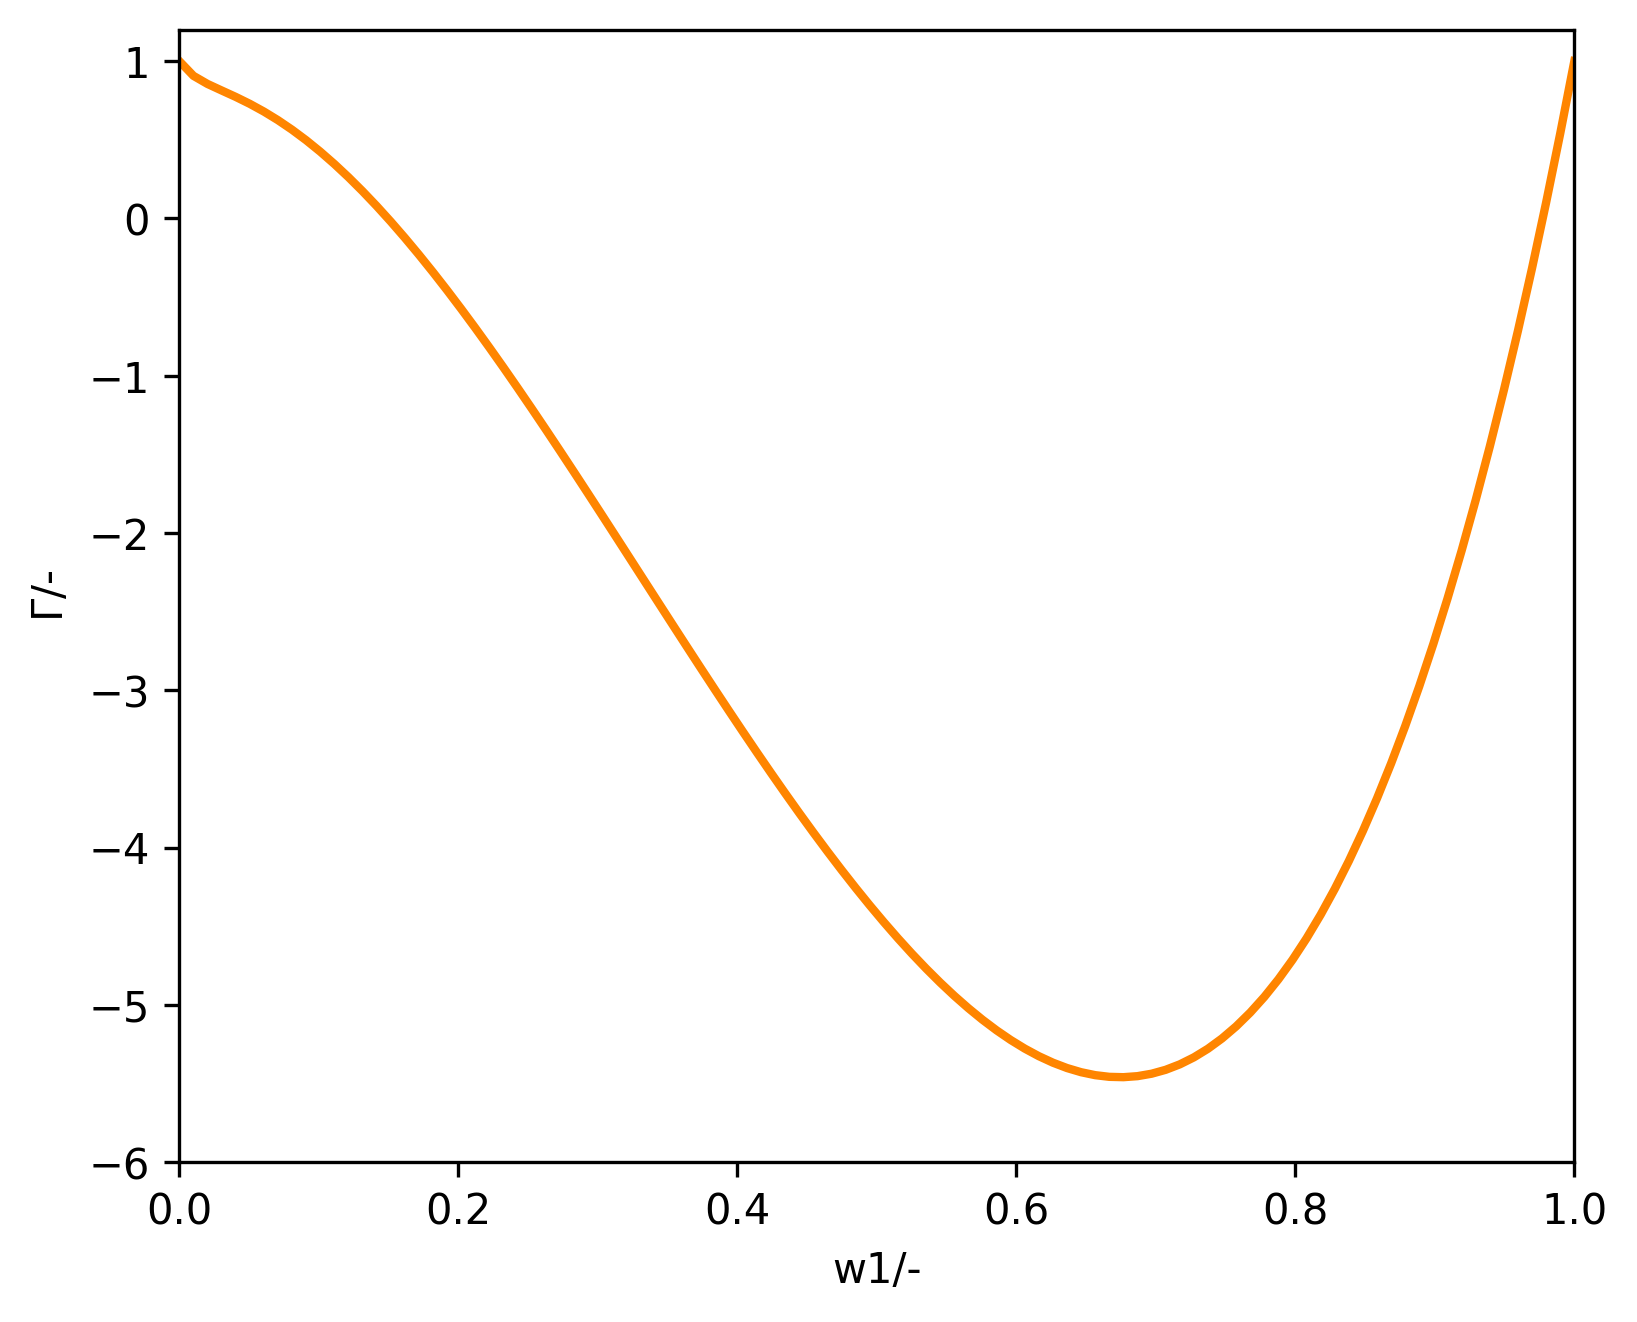

In [7]:
font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

colorLLE = "#FF8500"

fig, ax = plt.subplots(figsize = (6, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax.plot(wi[0,:],THij, "-",color = colorLLE , 
        linewidth = 2.0, label = "THFaktor")
ax.set_ylim([-6,1.2])
ax.set_xlim([0,1])
ax.set_xlabel("w1/-")
ax.set_ylabel("$\Gamma$/-")